After detailed research, we decided to fetch the data to be utilized within the scope of the model to be developed from the BoxScoreAdvancedV2 API. In order to validate the model, we planned to make transfer predictions for the past seasons as well. For this reason, we fetch 10 years of records from the 2015-16 season to 2024-25. Specified data consists of detailed player statistics for an individual game. The advanced attributes can be listed as follows:

* START_POSITION: The starting position of the player in the game (e.g., "G" for Guard, "C" for Center).
* MIN: Total minutes played by the player during the game.
* OFF_RATING (Offensive Rating): Points scored per 100 possessions by the team while the player was on the court.
* DEF_RATING (Defensive Rating): Points allowed per 100 possessions by the team while the player was on the court.
* AST_PCT (Assist Percentage): The percentage of teammate field goals that the player assisted while on the court.
* AST_TOV (Assist to Turnover Ratio): Ratio of assists to turnovers made by the player.
* AST_RATIO (Assist Ratio): Assists per 100 possessions used by the player.
* OREB_PCT (Offensive Rebound Percentage): Percentage of available offensive rebounds a player grabbed while on the court.
* DREB_PCT (Defensive Rebound Percentage): Percentage of available defensive rebounds a player grabbed while on the court.
* REB_PCT (Rebound Percentage): Percentage of total rebounds (offensive + defensive) a player grabbed while on the court.
* TM_TOV_PCT (Team Turnover Percentage): The percentage of team possessions ending in a turnover while the player was on the court.
* EFG_PCT (Effective Field Goal Percentage): A shooting percentage adjusted to account for the fact that three-point shots are worth more than two-point shots.
* TS_PCT (True Shooting Percentage): A shooting efficiency metric that accounts for field goals, three-pointers, and free throws.
* USG_PCT (Usage Percentage): The percentage of team plays used by the player while on the court (includes field goal attempts, free throw attempts, and turnovers).
* PACE: The number of possessions per 48 minutes by the player's team while they were on the court.
* PACE_PER40: Adjusted pace statistic per 40 minutes instead of 48.
* POSS: Total number of possessions the player was involved in during the game.
* PIE (Player Impact Estimate): A metric that estimates a player's overall statistical contribution to the game relative to the total statistics of the game.

After the return from the API, we push the data directly to a csv file.

In [47]:
import pandas as pd
import seaborn as sns
import pandas as pd
df = pd.read_csv("PlayerStats_2015-2025.csv")
df.head()

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,NaN,...,11.4,0.396,0.475,0.330,0.329,93.33,89.71,74.75,87,0.190
1,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,NaN,...,11.4,0.396,0.475,0.330,0.329,93.33,89.71,74.75,87,0.190
2,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,F,NaN,...,6.7,0.333,0.418,0.179,0.178,92.51,87.10,72.59,55,0.180
3,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,F,NaN,...,6.7,0.333,0.418,0.179,0.178,92.51,87.10,72.59,55,0.180
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,C,NaN,...,0.0,1.000,0.945,0.074,0.075,93.92,92.05,76.71,61,0.073


In [48]:
df.drop(
    columns=[
        "COMMENT",
        "E_OFF_RATING",
        "E_DEF_RATING",
        "E_NET_RATING",
        "E_USG_PCT",
        "NET_RATING",
        "E_PACE"
    ],
    inplace=True,
)

In [49]:
df.dropna(subset=["MIN"], inplace=True)

In [50]:
def get_sec(time_str):
    minute, s = time_str.split(":")
    m = minute.split(".")
    return int(m[0]) * 60 + int(s)

In [51]:
df.loc[:, "MIN"] = df.loc[:, "MIN"].map(lambda x: get_sec(x))

In [52]:
df

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,...,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PACE_PER40,POSS,PIE
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,2809,...,0.192,0.109,11.4,0.396,0.475,0.330,89.71,74.75,87,0.190
1,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,2809,...,0.192,0.109,11.4,0.396,0.475,0.330,89.71,74.75,87,0.190
2,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,F,1802,...,0.294,0.215,6.7,0.333,0.418,0.179,87.10,72.59,55,0.180
3,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,F,1802,...,0.294,0.215,6.7,0.333,0.418,0.179,87.10,72.59,55,0.180
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,C,1909,...,0.083,0.043,0.0,1.000,0.945,0.074,92.05,76.71,61,0.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661528,12400003,2024-10-04,1610612747,LAL,Los Angeles,1642422,Armel Traore,Armel,NaN,250,...,0.000,0.111,0.0,1.000,1.025,0.182,109.44,91.20,10,0.243
661529,12400003,2024-10-04,1610612747,LAL,Los Angeles,1630283,Kylor Kelley,Kylor,NaN,354,...,0.000,0.000,20.0,0.667,0.667,0.364,89.49,74.58,11,0.037
661530,12400003,2024-10-04,1610612747,LAL,Los Angeles,1630283,Kylor Kelley,Kylor,NaN,354,...,0.000,0.000,20.0,0.667,0.667,0.364,89.49,74.58,11,0.037
661531,12400003,2024-10-04,1610612747,LAL,Los Angeles,1642439,Quincy Olivari,Quincy,NaN,185,...,0.667,0.333,50.0,0.000,1.136,0.250,108.97,90.81,7,0.381


In [53]:
df.START_POSITION.value_counts(dropna=False)

START_POSITION
NaN    291502
F      100192
G      100192
C       50098
Name: count, dtype: int64

In [54]:
import numpy as np
mapping = {
    np.nan: 0,
    "G": 1,
    "F": 2, 
    "C": 3
    }
    
df.loc[:, "START_POSITION"] = df.START_POSITION.map(mapping)
df.loc[:, "START_POSITION"] = df.loc[:, "START_POSITION"].astype(int)

In [55]:
df.isnull().sum()

GAME_ID              0
GAME_DATE            0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_CITY            0
PLAYER_ID            0
PLAYER_NAME          0
NICKNAME             0
START_POSITION       0
MIN                  0
OFF_RATING           0
DEF_RATING           0
AST_PCT              0
AST_TOV              0
AST_RATIO            0
OREB_PCT             0
DREB_PCT             0
REB_PCT              0
TM_TOV_PCT           0
EFG_PCT              0
TS_PCT               0
USG_PCT              0
PACE                 0
PACE_PER40           0
POSS                 0
PIE                  0
dtype: int64

In [56]:
df.duplicated().sum()

271020

In [57]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [58]:
df.columns

Index(['GAME_ID', 'GAME_DATE', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY',
       'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'MIN',
       'OFF_RATING', 'DEF_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'PACE', 'PACE_PER40', 'POSS', 'PIE'],
      dtype='object')

In [59]:
df

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,...,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PACE_PER40,POSS,PIE
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,2,2809,...,0.192,0.109,11.4,0.396,0.475,0.330,89.71,74.75,87,0.190
1,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,2,1802,...,0.294,0.215,6.7,0.333,0.418,0.179,87.10,72.59,55,0.180
2,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,3,1909,...,0.083,0.043,0.0,1.000,0.945,0.074,92.05,76.71,61,0.073
3,41500407,2016-06-19,1610612739,CLE,Cleveland,2747,JR Smith,JR,1,2335,...,0.093,0.047,11.8,0.462,0.462,0.176,90.66,75.55,73,0.043
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202681,Kyrie Irving,Kyrie,1,2580,...,0.064,0.065,7.4,0.478,0.525,0.277,89.30,74.42,80,0.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270959,12400003,2024-10-04,1610612747,LAL,Los Angeles,1642355,Bronny James,Bronny,0,964,...,0.053,0.029,12.5,0.167,0.167,0.200,100.08,83.40,33,-0.007
270960,12400003,2024-10-04,1610612747,LAL,Los Angeles,1630658,Colin Castleton,Colin,0,711,...,0.067,0.083,20.0,0.000,0.568,0.094,121.52,101.27,30,0.022
270961,12400003,2024-10-04,1610612747,LAL,Los Angeles,1642422,Armel Traore,Armel,0,250,...,0.000,0.111,0.0,1.000,1.025,0.182,109.44,91.20,10,0.243
270962,12400003,2024-10-04,1610612747,LAL,Los Angeles,1630283,Kylor Kelley,Kylor,0,354,...,0.000,0.000,20.0,0.667,0.667,0.364,89.49,74.58,11,0.037


In [60]:
features = [
    col
    for col in df.columns
    if col
    not in (
        "GAME_ID",
        "TEAM_ID",
        "TEAM_ABBREVIATION",
        "TEAM_CITY",
        "PLAYER_ID",
        "PLAYER_NAME",
        "NICKNAME",
        "GAME_DATE"
    )
]

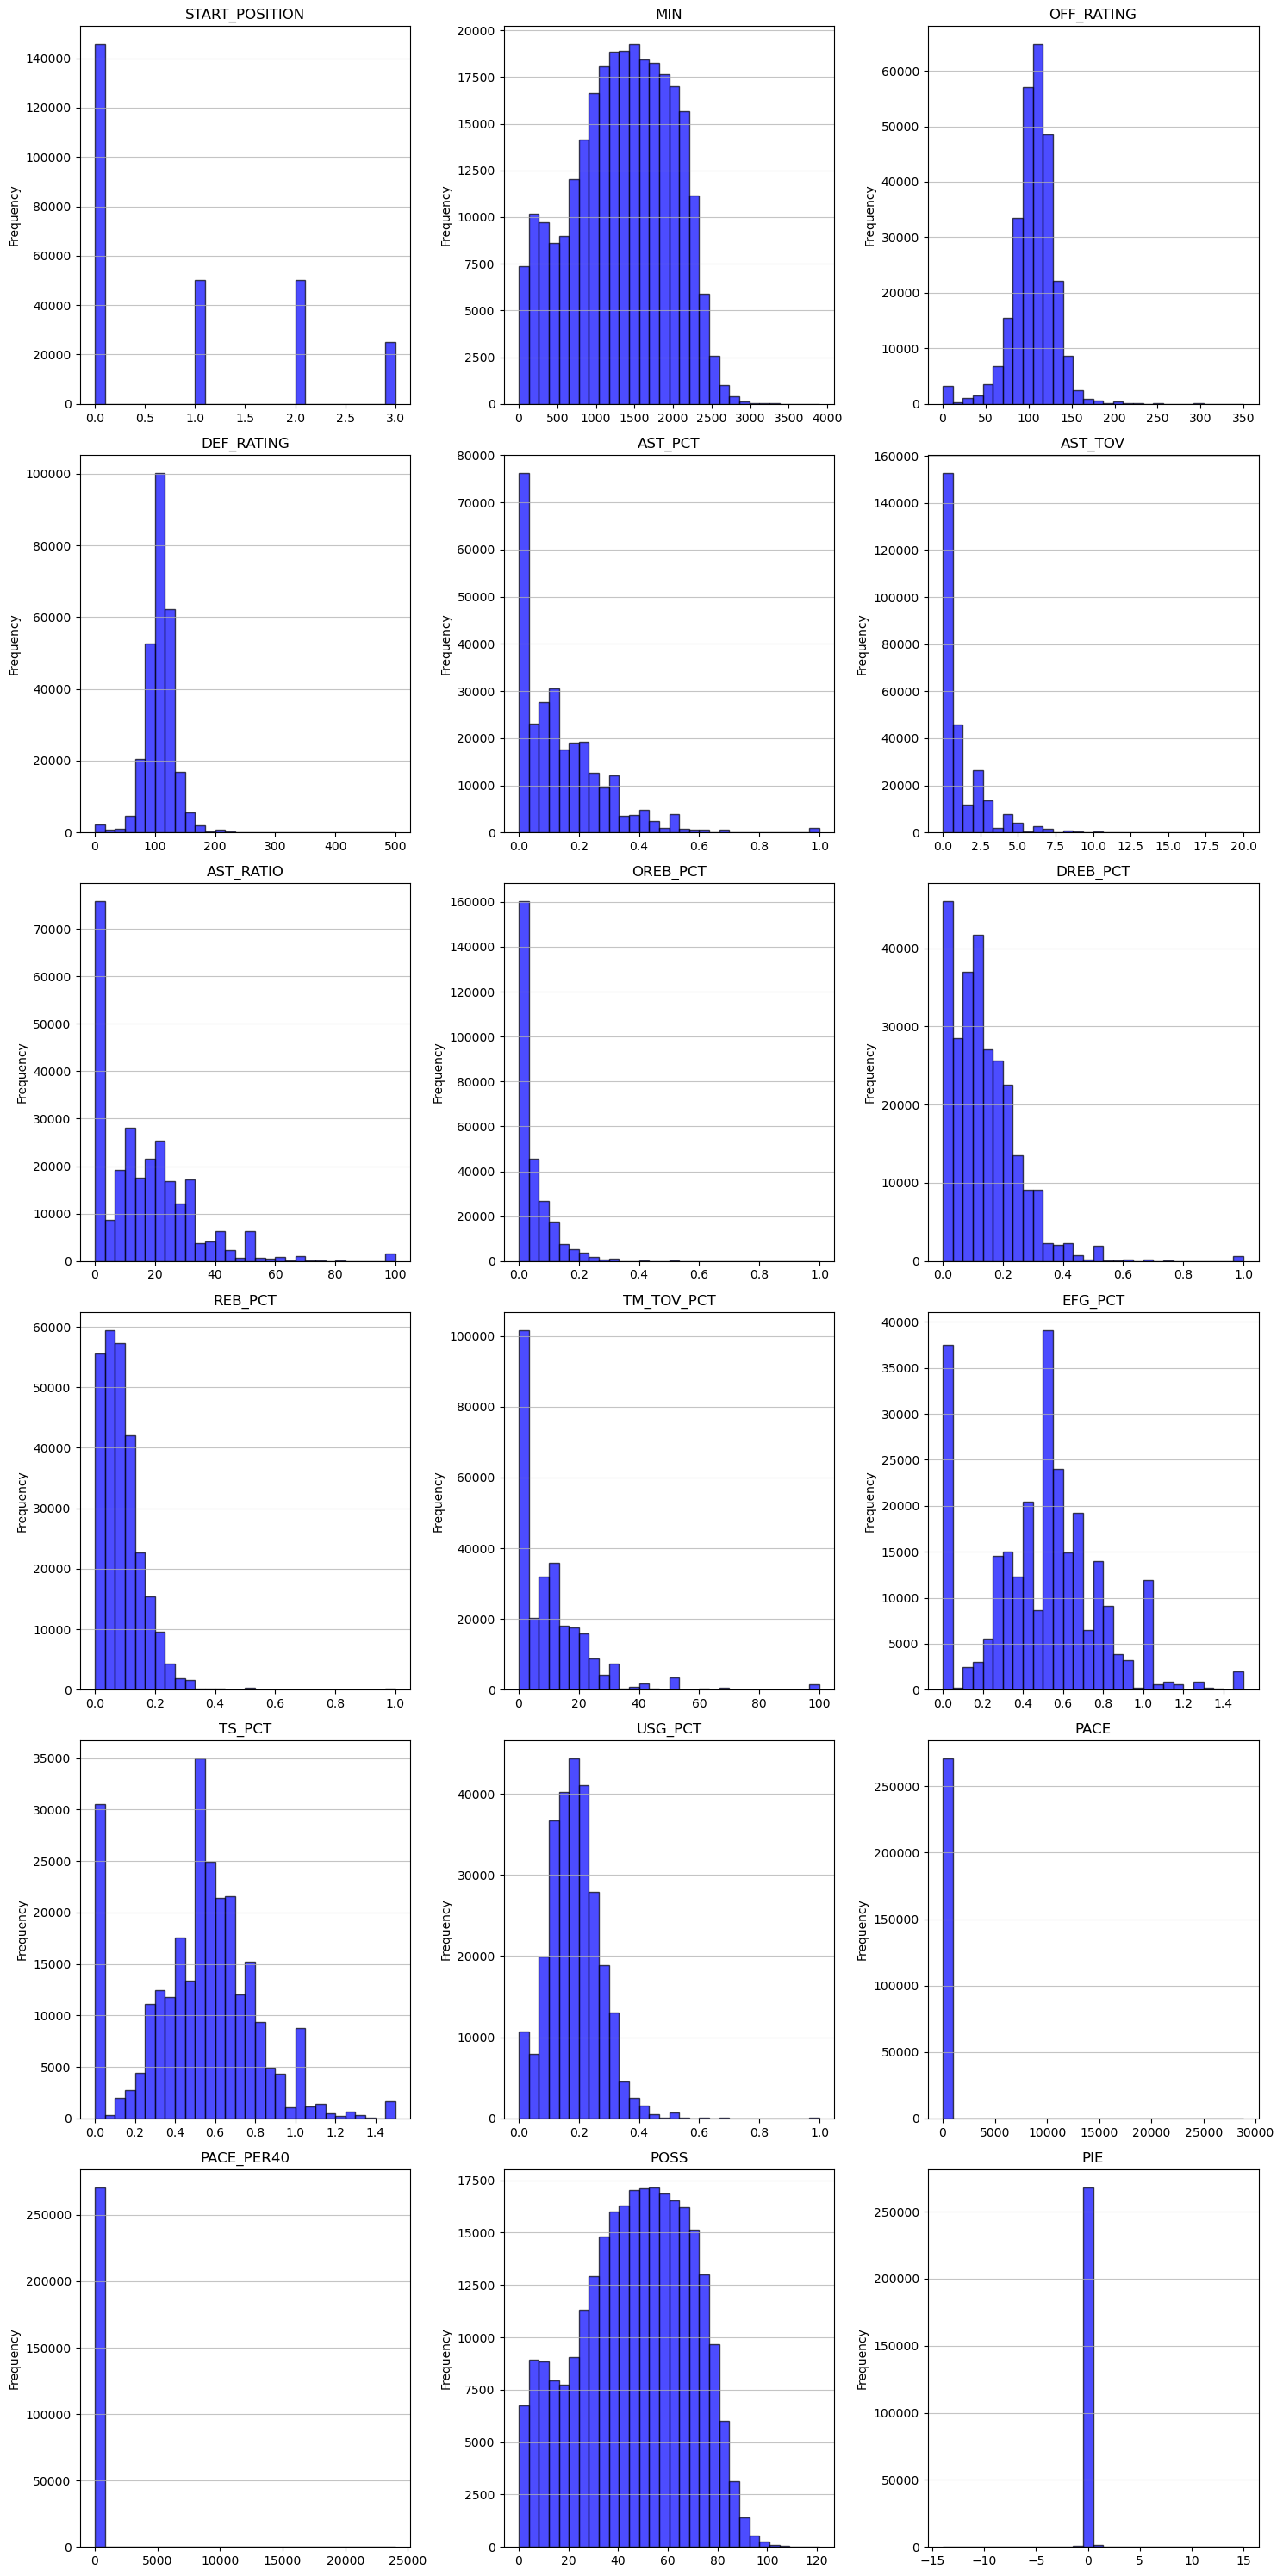

In [61]:
import matplotlib.pyplot as plt
import math

num_features = len(features)
num_cols = 3 
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(df[feature].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(f"{feature}")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)

for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Looking at the plots, we can say most of the variables are right skewed while MIN, OFF_RATING and POSS introduce a slightly more normal distribution. 

In [62]:
df[features].describe()

,OFF_RATING,DEF_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PACE_PER40,POSS,PIE
count,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.00000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000
mean,105.572386,107.968846,0.138960,1.019675,16.246016,0.041238,0.135281,0.088425,10.23082,0.487696,0.520194,0.183698,102.784491,85.653714,46.574918,0.088382
std,24.747420,24.554691,0.144605,1.582894,15.778483,0.063211,0.112341,0.070405,12.79162,0.290735,0.279419,0.086516,95.225405,79.354499,21.962739,0.175380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,94.100000,95.700000,0.000000,0.000000,0.000000,0.000000,0.059000,0.041000,0.00000,0.333000,0.372000,0.128000,96.000000,80.000000,31.000000,0.035000
50%,107.300000,108.200000,0.107000,0.330000,14.300000,0.000000,0.118000,0.077000,7.70000,0.500000,0.533000,0.179000,100.430000,83.690000,48.000000,0.089000
75%,120.000000,120.800000,0.211000,1.500000,25.000000,0.063000,0.190000,0.123000,15.40000,0.667000,0.688000,0.236000,105.220000,87.680000,64.000000,0.143000
max,350.000000,500.000000,1.000000,20.000000,100.000000,1.000000,1.000000,1.000000,100.00000,1.500000,1.500000,1.000000,28811.520000,24009.600000,121.000000,15.000000


In [63]:
num_fts = features.copy()
num_fts.remove('START_POSITION')

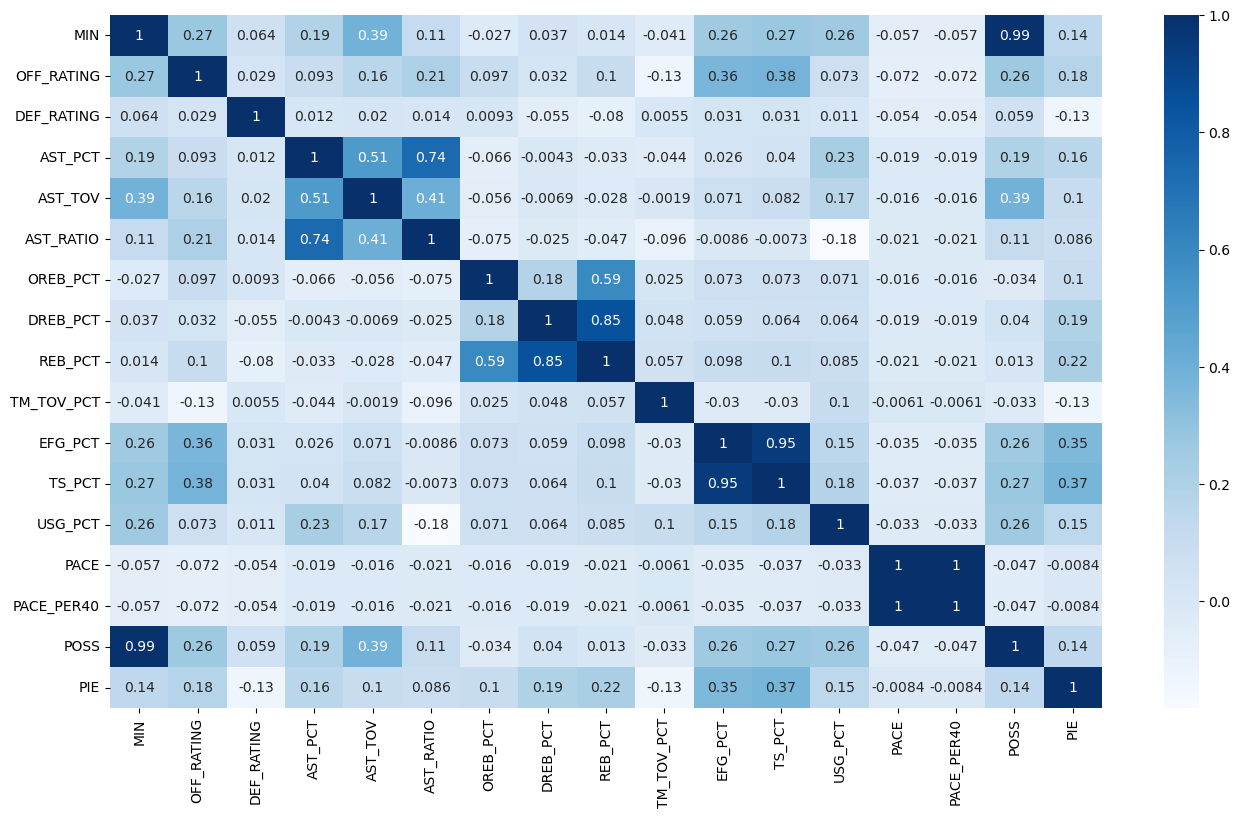

In [64]:
corrs = df[num_fts].corr()

plt.figure(figsize=(16, 9))
sns.heatmap(corrs, cmap='Blues', annot=True)
plt.show()

## Grouping

In [65]:
# shooting guard
sg_group_1 = ['OFF_RATING', 'AST_PCT', 'AST_TOV', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'POSS']
sg_group_2 = ['MIN', 'AST_RATIO', 'DREB_PCT']
sg_group_3 = ['OREB_PCT', 'REB_PCT', 'USG_PCT', 'PACE', 'PACE_PER40', 'PIE']
sg_group_4 = ['START_POSITION']
sg_group_5 = ['DEF_RATING']

# point guard
pg_group_1 = ['OFF_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO', 'EFG_PCT', 'TS_PCT', 'POSS']
pg_group_2 = ['MIN', 'USG_PCT', 'DREB_PCT']
pg_group_3 = ['OREB_PCT', 'REB_PCT', 'PIE']
pg_group_4 = ['START_POSITION']
pg_group_5 = ['DEF_RATING']

# small forward
sf_group_1 = ['OFF_RATING', 'AST_PCT', 'EFG_PCT', 'TS_PCT', 'POSS']
sf_group_2 = ['MIN', 'AST_RATIO', 'USG_PCT']
sf_group_3 = ['OREB_PCT', 'REB_PCT', 'PIE']
sf_group_4 = ['START_POSITION']
sf_group_5 = ['DEF_RATING']

# power forward
pf_group_1 = ['OFF_RATING', 'EFG_PCT', 'TS_PCT', 'POSS', 'USG_PCT']
pf_group_2 = ['MIN', 'AST_RATIO', 'DREB_PCT']
pf_group_3 = ['OREB_PCT', 'REB_PCT', 'PIE']
pf_group_4 = ['START_POSITION']
pf_group_5 = ['DEF_RATING']

# center
c_group_1 = ['DEF_RATING', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'POSS']
c_group_2 = ['MIN', 'USG_PCT', 'DREB_PCT']
c_group_3 = ['OFF_RATING', 'EFG_PCT', 'TS_PCT', 'PIE']
c_group_4 = ['START_POSITION']
c_group_5 = ['AST_PCT']

In [66]:
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

df_2015_2021 = df[(df['GAME_DATE'].dt.year >= 2015) & (df['GAME_DATE'].dt.year <= 2021)]

df_2022_2024 = df[(df['GAME_DATE'].dt.year >= 2022) & (df['GAME_DATE'].dt.year <= 2024)]

print(f"2015-2021: {df_2015_2021.shape}, 2022-2024: {df_2022_2024.shape}")

2015-2021: (187805, 26), 2022-2024: (83159, 26)


In [67]:
df_2015_2021.to_csv('nba_data_2015_2021.csv', index=False)
df_2022_2024.to_csv('nba_data_2022_2024.csv', index=False)

## PCA

In [68]:
data_2015_2021 = df_2015_2021[features].copy()

In [69]:
data_scaled = data_2015_2021.copy()
data_scaled.head()

,START_POSITION,MIN,OFF_RATING,DEF_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PACE_PER40,POSS,PIE
0,2,2809,103.4,97.7,0.458,2.2,25.0,0.020,0.192,0.109,11.4,0.396,0.475,0.330,89.71,74.75,87,0.190
1,2,1802,120.0,87.0,0.150,3.0,20.0,0.129,0.294,0.215,6.7,0.333,0.418,0.179,87.10,72.59,55,0.180
2,3,1909,100.0,96.7,0.000,0.0,0.0,0.000,0.083,0.043,0.0,1.000,0.945,0.074,92.05,76.71,61,0.073
3,1,2335,113.7,102.7,0.087,1.0,11.8,0.000,0.093,0.047,11.8,0.462,0.462,0.176,90.66,75.55,73,0.043
4,1,2580,108.8,96.3,0.050,0.5,3.7,0.065,0.064,0.065,7.4,0.478,0.525,0.277,89.30,74.42,80,0.109


In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scaled)

In [71]:
data_scaled

array([[0.66666667, 0.72062596, 0.29542857, ..., 0.00622668, 0.71900826,
        0.61695652],
       [0.66666667, 0.46228835, 0.34285714, ..., 0.00604675, 0.45454545,
        0.61652174],
       [1.        , 0.48973833, 0.28571429, ..., 0.00638994, 0.50413223,
        0.61186957],
       ...,
       [0.        , 0.19061057, 0.20114286, ..., 0.00739871, 0.2231405 ,
        0.60869565],
       [0.        , 0.14930734, 0.22857143, ..., 0.00686975, 0.16528926,
        0.60804348],
       [0.        , 0.11159569, 0.26657143, ..., 0.00689391, 0.12396694,
        0.61695652]])

In [72]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_scaled)
pca.explained_variance_ratio_

array([4.18330605e-01, 1.93054526e-01, 1.30927388e-01, 8.37427377e-02,
       4.89088398e-02, 4.35878316e-02, 2.71162327e-02, 1.29252775e-02,
       1.05580295e-02, 1.01365059e-02, 6.73608292e-03, 6.57815029e-03,
       5.49537823e-03, 9.13668973e-04, 6.76145187e-04, 1.93478540e-04,
       1.19122917e-04, 1.41122226e-13])

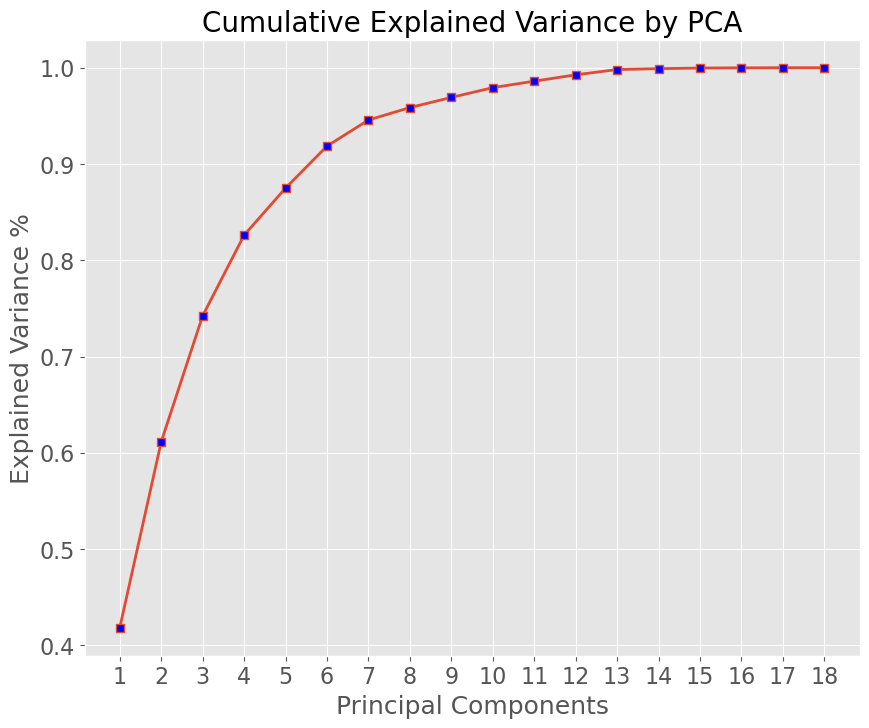

In [73]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(10, 8))
    plt.plot(range(1, 19), pca.explained_variance_ratio_.cumsum(), 
             markerfacecolor='blue', marker='s', linestyle='-', linewidth=2)
    plt.xlabel('Principal Components', fontsize=18)
    plt.ylabel('Explained Variance %', fontsize=18)
    plt.xticks(ticks=range(1, 19), fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('Cumulative Explained Variance by PCA', fontsize=20)
    plt.show()


In [74]:
pca = PCA(n_components = 4)
pca.fit(data_scaled)
pca_scores = pca.transform(data_scaled)

## K-Means

In [75]:
km_df = df_2015_2021.copy()

In [76]:
from sklearn.cluster import KMeans
wcss = list()

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=1)
    kmeans.fit(pca_scores)
    wcss.append(kmeans.inertia_)

In [77]:
wcss

[54215.61804231871,
 32261.542777814495,
 25262.138444226934,
 20445.824390534486,
 18178.128989783305,
 16115.903340616409,
 14671.356935084828,
 13599.132021093168,
 12662.579428719791,
 11881.957945923648]

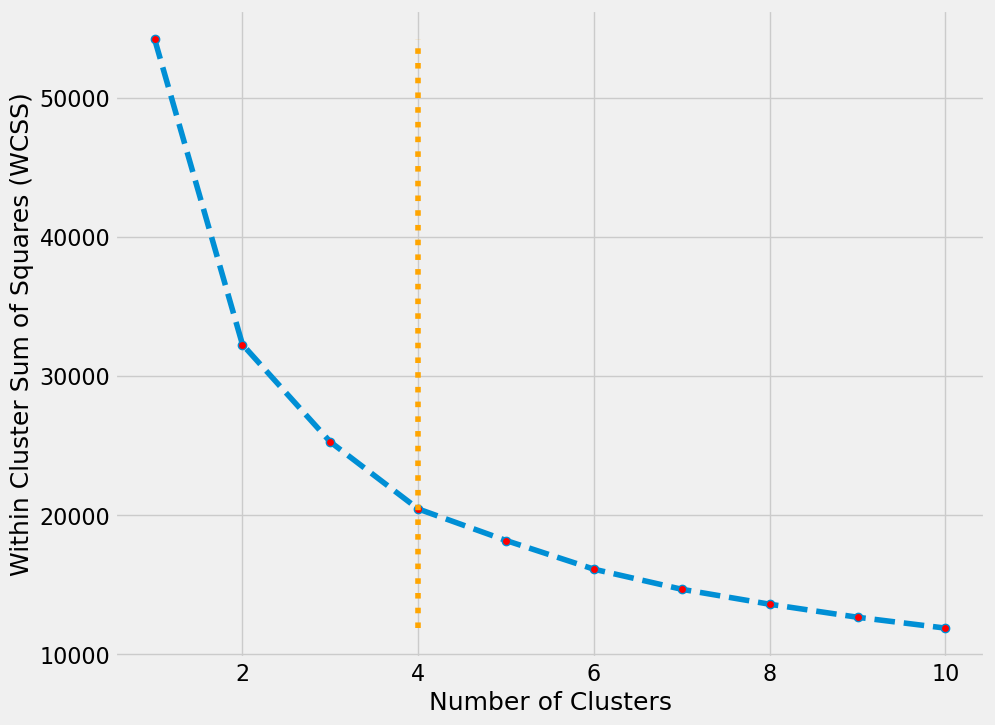

Optimal number of clusters: 4


In [78]:
from kneed import KneeLocator

with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(10, 8))
    plt.plot(range(1, 11), wcss, marker='o', markerfacecolor='red', linestyle='--')
    plt.vlines(KneeLocator([i for i in range(1, 11)], wcss, curve='convex', direction='decreasing').knee, ymin=min(
        wcss), ymax=max(wcss), linestyles='dotted', color='orange')
    plt.xlabel('Number of Clusters', fontsize=18)
    plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

n_clusters = KneeLocator([i for i in range(1, 11)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters:", n_clusters)

In [79]:
kmeans_pca = KMeans(n_clusters=4, init='random', random_state=1)
kmeans_pca.fit_predict(pca_scores)
km_df['km_cluster'] = kmeans_pca.labels_

In [80]:
pca_km_df = pd.concat([km_df.reset_index(drop=True), pd.DataFrame(
    data=pca_scores, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4'])], axis=1)

In [81]:
pca_km_df.head()

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,...,USG_PCT,PACE,PACE_PER40,POSS,PIE,km_cluster,pca_1,pca_2,pca_3,pca_4
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,2,2809,...,0.330,89.71,74.75,87,0.190,1,0.572885,-0.080019,0.390113,0.114654
1,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,2,1802,...,0.179,87.10,72.59,55,0.180,1,0.385601,-0.214780,0.036019,-0.063064
2,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,3,1909,...,0.074,92.05,76.71,61,0.073,1,0.784950,0.161279,-0.342901,-0.064941
3,41500407,2016-06-19,1610612739,CLE,Cleveland,2747,JR Smith,JR,1,2335,...,0.176,90.66,75.55,73,0.043,3,0.188411,-0.000870,0.095659,0.276210
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202681,Kyrie Irving,Kyrie,1,2580,...,0.277,89.30,74.42,80,0.109,3,0.237746,0.044494,0.051963,0.384982


In [82]:
pca_km_df.km_cluster.value_counts()

km_cluster
2    55651
1    51770
3    42038
0    38346
Name: count, dtype: int64

In [83]:
pca_km_df.groupby(['km_cluster'])[sg_group_1].agg("mean")

,OFF_RATING,AST_PCT,AST_TOV,TM_TOV_PCT,EFG_PCT,TS_PCT,POSS
km_cluster,,,,,,,
0,88.587827,0.107556,0.357738,11.578227,0.108637,0.151690,23.269233
1,107.955536,0.116050,1.052288,10.408884,0.532793,0.564298,59.838961
2,108.280180,0.109196,0.533526,10.208237,0.681038,0.704751,36.371170
3,108.502866,0.227848,2.110800,9.663895,0.495281,0.533972,64.663685


In [84]:
pca_km_df.groupby(['km_cluster'])[pg_group_1].agg("mean")

,OFF_RATING,AST_PCT,AST_TOV,AST_RATIO,EFG_PCT,TS_PCT,POSS
km_cluster,,,,,,,
0,88.587827,0.107556,0.357738,15.035271,0.108637,0.151690,23.269233
1,107.955536,0.116050,1.052288,14.037452,0.532793,0.564298,59.838961
2,108.280180,0.109196,0.533526,13.264692,0.681038,0.704751,36.371170
3,108.502866,0.227848,2.110800,22.352153,0.495281,0.533972,64.663685


In [85]:
pca_km_df.groupby(['km_cluster'])[sf_group_1].agg("mean")

,OFF_RATING,AST_PCT,EFG_PCT,TS_PCT,POSS
km_cluster,,,,,
0,88.587827,0.107556,0.108637,0.151690,23.269233
1,107.955536,0.116050,0.532793,0.564298,59.838961
2,108.280180,0.109196,0.681038,0.704751,36.371170
3,108.502866,0.227848,0.495281,0.533972,64.663685


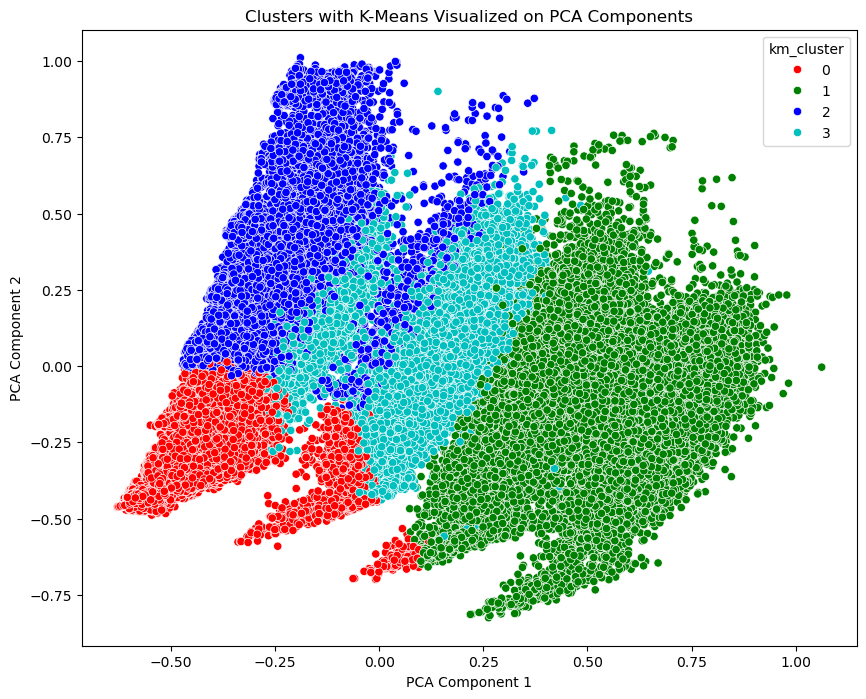

In [86]:
x_axis = pca_km_df['pca_1']
y_axis = pca_km_df['pca_2']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=pca_km_df['km_cluster'], palette=['r', 'g', 'b', 'c'])
plt.title("Clusters with K-Means Visualized on PCA Components")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [87]:
pca_km_df.groupby(['km_cluster'])[pf_group_1].agg("mean")

,OFF_RATING,EFG_PCT,TS_PCT,POSS,USG_PCT
km_cluster,,,,,
0,88.587827,0.108637,0.151690,23.269233,0.142489
1,107.955536,0.532793,0.564298,59.838961,0.192407
2,108.280180,0.681038,0.704751,36.371170,0.183326
3,108.502866,0.495281,0.533972,64.663685,0.215013


In [88]:
pca_km_df.groupby(['km_cluster'])[c_group_1].agg("mean")

,DEF_RATING,OREB_PCT,DREB_PCT,REB_PCT,POSS
km_cluster,,,,,
0,104.826522,0.032348,0.120644,0.075594,23.269233
1,108.097292,0.055398,0.171432,0.113552,59.838961
2,105.772973,0.045988,0.136678,0.092215,36.371170
3,107.650595,0.022480,0.106086,0.064280,64.663685


# Gaussian Mixture Models

In [89]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

In [90]:
gm_df = data_2015_2021.copy()

In [91]:
# find the optimum number of clusters
bgm = BayesianGaussianMixture(n_components=10, n_init=7, max_iter=1000)
bgm.fit(pca_scores)
np.round(bgm.weights_, 2)

array([0.06, 0.18, 0.03, 0.21, 0.07, 0.09, 0.05, 0.14, 0.14, 0.03])

It returned weights of clusters

In [92]:
# Instantiate a GM model with 4 clusters, fit and predict cluster indices
gm = GaussianMixture(n_components=4, init_params='kmeans', tol=1e-4,
                     covariance_type='full', n_init=10, random_state=1)
gm_df['gm_cluster'] = gm.fit_predict(pca_scores)

In [93]:
pca_gm_df = pd.concat([gm_df.reset_index(drop=True), pd.DataFrame(
    data=pca_scores, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4'])], axis=1)
pca_gm_df.head()

,START_POSITION,MIN,OFF_RATING,DEF_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,...,USG_PCT,PACE,PACE_PER40,POSS,PIE,gm_cluster,pca_1,pca_2,pca_3,pca_4
0,2,2809,103.4,97.7,0.458,2.2,25.0,0.020,0.192,0.109,...,0.330,89.71,74.75,87,0.190,1,0.572885,-0.080019,0.390113,0.114654
1,2,1802,120.0,87.0,0.150,3.0,20.0,0.129,0.294,0.215,...,0.179,87.10,72.59,55,0.180,1,0.385601,-0.214780,0.036019,-0.063064
2,3,1909,100.0,96.7,0.000,0.0,0.0,0.000,0.083,0.043,...,0.074,92.05,76.71,61,0.073,1,0.784950,0.161279,-0.342901,-0.064941
3,1,2335,113.7,102.7,0.087,1.0,11.8,0.000,0.093,0.047,...,0.176,90.66,75.55,73,0.043,3,0.188411,-0.000870,0.095659,0.276210
4,1,2580,108.8,96.3,0.050,0.5,3.7,0.065,0.064,0.065,...,0.277,89.30,74.42,80,0.109,3,0.237746,0.044494,0.051963,0.384982


In [94]:
# check for the clusters' balance
pca_gm_df.gm_cluster.value_counts()

gm_cluster
0    83023
1    52314
3    34475
2    17993
Name: count, dtype: int64

In [95]:
pca_gm_df.groupby(['gm_cluster'])[sg_group_1].agg("mean")

,OFF_RATING,AST_PCT,AST_TOV,TM_TOV_PCT,EFG_PCT,TS_PCT,POSS
gm_cluster,,,,,,,
0,105.195764,0.125561,0.727033,9.962477,0.546290,0.585972,38.129591
1,107.896955,0.116800,1.055633,10.420193,0.530261,0.561821,59.594124
2,81.178319,0.095893,0.167899,13.061785,0.000000,0.000011,13.166120
3,108.315011,0.218341,1.972851,10.150503,0.503984,0.541179,64.174938


The cluster 3 is more suitable for the shooting guard position, as it exhibits higher mean values for the features compared to the other clusters.

In [96]:
pca_gm_df.groupby(['gm_cluster'])[pg_group_1].agg("mean")

,OFF_RATING,AST_PCT,AST_TOV,AST_RATIO,EFG_PCT,TS_PCT,POSS
gm_cluster,,,,,,,
0,105.195764,0.125561,0.727033,14.892638,0.546290,0.585972,38.129591
1,107.896955,0.116800,1.055633,14.122938,0.530261,0.561821,59.594124
2,81.178319,0.095893,0.167899,15.825727,0.000000,0.000011,13.166120
3,108.315011,0.218341,1.972851,20.916125,0.503984,0.541179,64.174938


The cluster 3 is more suitable for the point_guard position, as it exhibits higher mean values for the features compared to the other clusters.

In [97]:
pca_gm_df.groupby(['gm_cluster'])[sf_group_1].agg("mean")

,OFF_RATING,AST_PCT,EFG_PCT,TS_PCT,POSS
gm_cluster,,,,,
0,105.195764,0.125561,0.546290,0.585972,38.129591
1,107.896955,0.116800,0.530261,0.561821,59.594124
2,81.178319,0.095893,0.000000,0.000011,13.166120
3,108.315011,0.218341,0.503984,0.541179,64.174938


The cluster 3 is more suitable for the small forward position, as it exhibits higher mean values for the features compared to the other clusters.

In [98]:
pca_gm_df.groupby(['gm_cluster'])[pf_group_1].agg("mean")

,OFF_RATING,EFG_PCT,TS_PCT,POSS,USG_PCT
gm_cluster,,,,,
0,105.195764,0.546290,0.585972,38.129591,0.183526
1,107.896955,0.530261,0.561821,59.594124,0.192320
2,81.178319,0.000000,0.000011,13.166120,0.100274
3,108.315011,0.503984,0.541179,64.174938,0.219394


The cluster 1 is more suitable for the power forward, as it exhibits higher mean values for the features compared to the other clusters.

In [99]:
pca_gm_df.groupby(['gm_cluster'])[c_group_1].agg("mean")

,DEF_RATING,OREB_PCT,DREB_PCT,REB_PCT,POSS
gm_cluster,,,,,
0,105.582015,0.042863,0.131915,0.087490,38.129591
1,108.131311,0.055428,0.172748,0.114274,59.594124
2,104.004502,0.024800,0.114823,0.070006,13.166120
3,108.304336,0.020543,0.101872,0.061203,64.174938


The cluster 1 is more suitable for the center, as it exhibits higher mean values for the features compared to the other clusters.

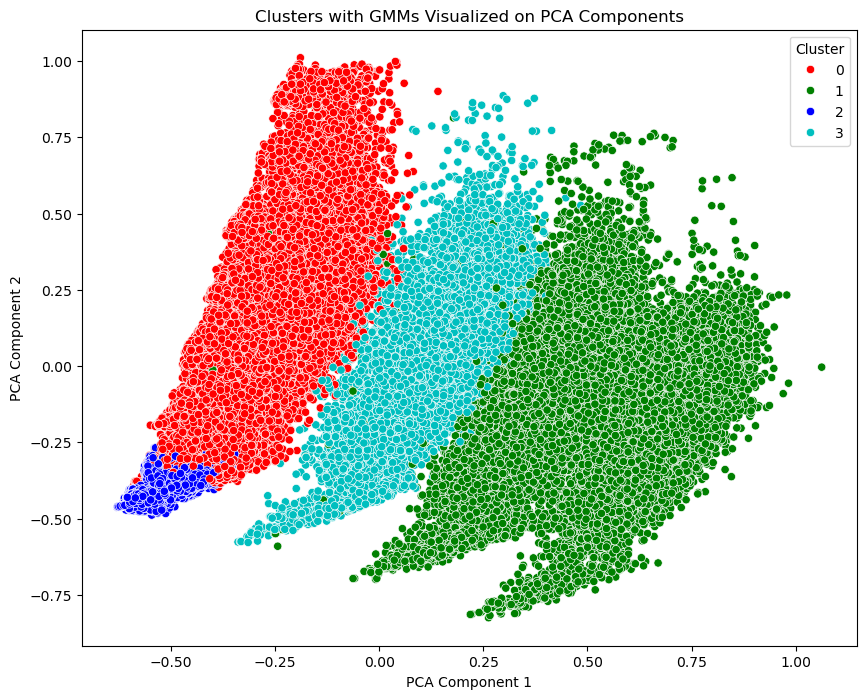

In [100]:
#Visualize clusters
x_axis = pca_gm_df['pca_1']
y_axis = pca_gm_df['pca_2']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=pca_gm_df['gm_cluster'], palette=['r', 'g', 'b', 'c'])
plt.title("Clusters with GMMs Visualized on PCA Components")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

Now cluster 3 and 0 is seperated better than other clusters compared to kmeans clustering

In [101]:
import numpy as np
from sklearn.metrics import accuracy_score

def train_model(df, folds, features, model):
    
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    scores = []
    
    fold_size = len(df) // folds

    for fold in range(folds):
        start = fold * fold_size
        end = (fold + 1) * fold_size if fold != folds - 1 else len(df)
        
        df_valid = df[start:end].reset_index(drop=True)
        
        df_train = pd.concat([df[:start], df[end:]], axis=0).reset_index(drop=True)

        X_train, y_train = df_train[features].values, df_train['gm_cluster'].values
        X_valid, y_valid = df_valid[features].values, df_valid['gm_cluster'].values

        model.fit(X_train, y_train)

        valid_preds = model.predict(X_valid)

        accuracy = accuracy_score(y_valid, valid_preds)

        print(f"Fold {fold}, Accuracy: {accuracy:.4f}")

        scores.append(accuracy)

    mean_accuracy = np.mean(scores)

    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    
    return mean_accuracy



In [102]:
def feat_permutation_importance(df, features, model):
    X = df[features]
    y = df["gm_cluster"]

    model = model

    model.fit(X, y)

    results = permutation_importance(model, X, y, scoring='f1_weighted')

    importance = results.importances_mean
    idxs = np.argsort(importance)
    importances = pd.Series(importance, index=features)

    plt.title('Permutation Feature Importance', fontsize=12)
    plt.barh(range(len(idxs)), importances.iloc[idxs], align='center')
    plt.yticks(range(len(idxs)), [features[i] for i in idxs])
    plt.xlabel('Feature Importance')
    plt.show()

    return importances

In [103]:
from sklearn.feature_selection import RFE

def rfe_feature_selection(df, features, num_features_to_select, model):
    X = df[features]
    y = df["gm_cluster"]
    
    model = model
    
    rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)
    
    rfe.fit(X, y)
    
    selected_features = [features[i] for i in range(len(features)) if rfe.support_[i]]
    
    rankings = pd.DataFrame({
        'Feature': features,
        'Ranking': rfe.ranking_
    }).sort_values(by='Ranking')
    
    return selected_features, rankings

In [104]:
def rfe_with_cv(df, features, model):
    X = df[features]
    y = df['gm_cluster']
    
    model = model
    results = {}
    
    for num_features in range(1, len(features)+1):
        rfe = RFE(estimator=model, n_features_to_select=num_features)
        rfe.fit(X, y)
        
        selected_features = [features[i] for i in range(len(features)) if rfe.support_[i]]
        score = cross_val_score(model, X[selected_features], y, cv=5, scoring='accuracy')
        
        results[num_features] = np.mean(score)
    
    return results

In [105]:
def compare_lists(l1, l2):
    return [j for i, j in zip(l1, l2) if i == True]

In [106]:
train_df = df_2015_2021.copy()
# Merge gm_df and train_df
train_df = train_df.merge(gm_df[['gm_cluster']], left_index=True, right_index=True, how='left')

train_df.head()

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,...,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PACE_PER40,POSS,PIE,gm_cluster
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,2,2809,...,0.109,11.4,0.396,0.475,0.330,89.71,74.75,87,0.190,1
1,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,2,1802,...,0.215,6.7,0.333,0.418,0.179,87.10,72.59,55,0.180,1
2,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,3,1909,...,0.043,0.0,1.000,0.945,0.074,92.05,76.71,61,0.073,1
3,41500407,2016-06-19,1610612739,CLE,Cleveland,2747,JR Smith,JR,1,2335,...,0.047,11.8,0.462,0.462,0.176,90.66,75.55,73,0.043,3
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202681,Kyrie Irving,Kyrie,1,2580,...,0.065,7.4,0.478,0.525,0.277,89.30,74.42,80,0.109,3


In [107]:
train_features = [
    col
    for col in df.columns
    if col
    not in (
        "GAME_ID",
        "TEAM_ID",
        "TEAM_ABBREVIATION",
        "TEAM_CITY",
        "PLAYER_ID",
        "PLAYER_NAME",
        "NICKNAME",
        "GAME_DATE",
        "gm_cluster",
    )
]
train_features

['START_POSITION',
 'MIN',
 'OFF_RATING',
 'DEF_RATING',
 'AST_PCT',
 'AST_TOV',
 'AST_RATIO',
 'OREB_PCT',
 'DREB_PCT',
 'REB_PCT',
 'TM_TOV_PCT',
 'EFG_PCT',
 'TS_PCT',
 'USG_PCT',
 'PACE',
 'PACE_PER40',
 'POSS',
 'PIE']

In [108]:
#Values to be scaled.
train_data = train_df[features].values

In [109]:
train_data = train_df[features].values
# initialize scaler
scaler = MinMaxScaler()

# fit scaler
scaler.fit(train_data)

# transform data
train_data_scaled = scaler.transform(train_data)

In [110]:
train_norm_features = [feat+'_n' for feat in train_features]

In [111]:
train_norm_df = pd.concat([train_df.reset_index(drop=True), pd.DataFrame(
    data=train_data_scaled, columns=train_norm_features)], axis=1)
train_norm_df.head()

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,...,DREB_PCT_n,REB_PCT_n,TM_TOV_PCT_n,EFG_PCT_n,TS_PCT_n,USG_PCT_n,PACE_n,PACE_PER40_n,POSS_n,PIE_n
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,2,2809,...,0.192,0.109,0.114,0.264000,0.316667,0.330,0.006227,0.006227,0.719008,0.616957
1,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,2,1802,...,0.294,0.215,0.067,0.222000,0.278667,0.179,0.006046,0.006047,0.454545,0.616522
2,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,3,1909,...,0.083,0.043,0.000,0.666667,0.630000,0.074,0.006390,0.006390,0.504132,0.611870
3,41500407,2016-06-19,1610612739,CLE,Cleveland,2747,JR Smith,JR,1,2335,...,0.093,0.047,0.118,0.308000,0.308000,0.176,0.006293,0.006293,0.603306,0.610565
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202681,Kyrie Irving,Kyrie,1,2580,...,0.064,0.065,0.074,0.318667,0.350000,0.277,0.006199,0.006199,0.661157,0.613435


# Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
# initialize Logistic Regression model
logres = LogisticRegression(max_iter = 1000,
    solver='lbfgs',
    n_jobs=-1)

In [113]:
train_model(train_norm_df, 5, train_norm_features, logres)

Fold 0, Accuracy: 0.9964
Fold 1, Accuracy: 0.9964
Fold 2, Accuracy: 0.9962
Fold 3, Accuracy: 0.9968
Fold 4, Accuracy: 0.9962
Mean Accuracy: 0.9964


0.9964271451771785

We have good accuracy score, but it's too high. We need to check feature importances

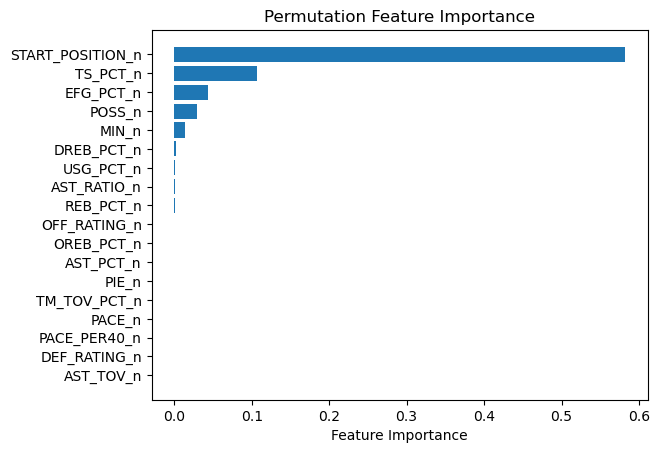

START_POSITION_n    0.581791
MIN_n               0.014170
OFF_RATING_n        0.000172
DEF_RATING_n       -0.000025
AST_PCT_n           0.000118
AST_TOV_n          -0.000075
AST_RATIO_n         0.001179
OREB_PCT_n          0.000127
DREB_PCT_n          0.002426
REB_PCT_n           0.000581
TM_TOV_PCT_n        0.000015
EFG_PCT_n           0.043946
TS_PCT_n            0.106707
USG_PCT_n           0.001254
PACE_n              0.000001
PACE_PER40_n        0.000001
POSS_n              0.028819
PIE_n               0.000017
dtype: float64

In [114]:
from sklearn.inspection import permutation_importance
feat_permutation_importance(train_norm_df, train_norm_features, logres)

In [115]:
train_model(train_norm_df, 5, ['START_POSITION_n'], logres)

Fold 0, Accuracy: 0.9018
Fold 1, Accuracy: 0.8995
Fold 2, Accuracy: 0.9033
Fold 3, Accuracy: 0.9045
Fold 4, Accuracy: 0.9046
Mean Accuracy: 0.9027


0.9027288943318869

Using the `START_POSITION_n` feature alone, we achieved an impressive accuracy of 90% in our logistic regression model. However, this feature dominates the model and causes overfitting, as it outperforms the other features significantly.


We encoded unknown positions as 0.

In [116]:
# Re-define norm_features
train_norm_features.remove('START_POSITION_n')

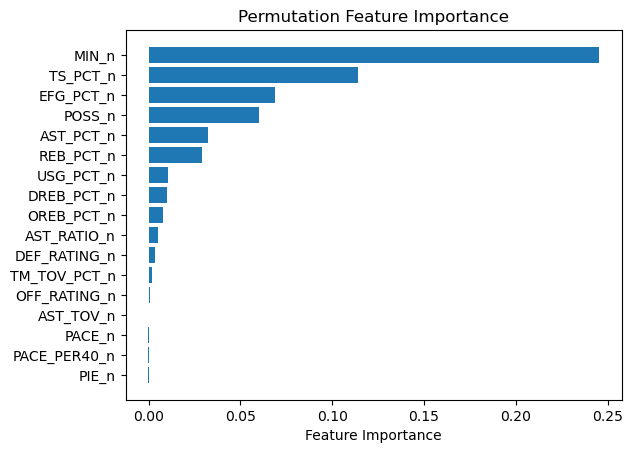

MIN_n           0.245282
OFF_RATING_n    0.000955
DEF_RATING_n    0.003677
AST_PCT_n       0.032306
AST_TOV_n       0.000066
AST_RATIO_n     0.005253
OREB_PCT_n      0.007929
DREB_PCT_n      0.010163
REB_PCT_n       0.029282
TM_TOV_PCT_n    0.002104
EFG_PCT_n       0.068747
TS_PCT_n        0.113992
USG_PCT_n       0.010846
PACE_n         -0.000013
PACE_PER40_n   -0.000013
POSS_n          0.060106
PIE_n          -0.000136
dtype: float64

In [117]:
feat_permutation_importance(train_norm_df, train_norm_features, logres)

The less time a player spends on the court, the lower the chance of achieving significant records (e.g., passes, points, etc.). The `MIN` variable directly represents the time a player spent on the court, making it a potential confounding factor. Therefore, we must consider ignoring it in our analysis.


In [118]:
# Re-define norm_features
train_norm_features.remove('MIN_n')

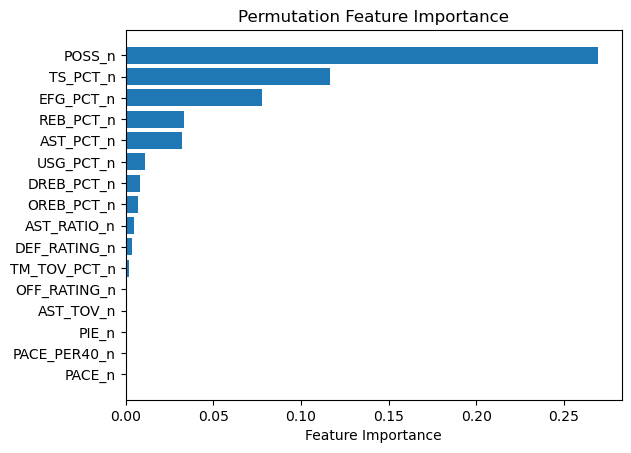

OFF_RATING_n    0.000679
DEF_RATING_n    0.003655
AST_PCT_n       0.032226
AST_TOV_n       0.000159
AST_RATIO_n     0.004541
OREB_PCT_n      0.006932
DREB_PCT_n      0.007985
REB_PCT_n       0.033349
TM_TOV_PCT_n    0.001610
EFG_PCT_n       0.077444
TS_PCT_n        0.116568
USG_PCT_n       0.011240
PACE_n          0.000009
PACE_PER40_n    0.000009
POSS_n          0.269427
PIE_n           0.000072
dtype: float64

In [119]:
feat_permutation_importance(train_norm_df, train_norm_features, logres)

In [120]:
# re-define feats
train_features.remove('START_POSITION')
train_features.remove('MIN')

In [121]:
train_df[train_features].shape

(187805, 16)

In [122]:
train_data = train_df[train_features].values

In [123]:
# initialize scaler
scaler = MinMaxScaler()

# fit scaler
scaler.fit(train_data)

# transform data
train_data_scaled = scaler.transform(train_data)

In [124]:
train_norm_df = pd.concat([train_df.reset_index(drop=True), pd.DataFrame(
    data=train_data_scaled, columns=train_norm_features)], axis=1)
train_norm_df.head()

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,...,DREB_PCT_n,REB_PCT_n,TM_TOV_PCT_n,EFG_PCT_n,TS_PCT_n,USG_PCT_n,PACE_n,PACE_PER40_n,POSS_n,PIE_n
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,2,2809,...,0.192,0.109,0.114,0.264000,0.316667,0.330,0.006227,0.006227,0.719008,0.616957
1,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,2,1802,...,0.294,0.215,0.067,0.222000,0.278667,0.179,0.006046,0.006047,0.454545,0.616522
2,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,3,1909,...,0.083,0.043,0.000,0.666667,0.630000,0.074,0.006390,0.006390,0.504132,0.611870
3,41500407,2016-06-19,1610612739,CLE,Cleveland,2747,JR Smith,JR,1,2335,...,0.093,0.047,0.118,0.308000,0.308000,0.176,0.006293,0.006293,0.603306,0.610565
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202681,Kyrie Irving,Kyrie,1,2580,...,0.064,0.065,0.074,0.318667,0.350000,0.277,0.006199,0.006199,0.661157,0.613435


# PCA

In [125]:
train_data_pca = train_norm_df.loc[:, train_norm_features].values

In [126]:
pca = PCA()
pca.fit(train_data_pca)
pca.explained_variance_ratio_

array([3.58783447e-01, 2.12273717e-01, 1.29659408e-01, 8.51576338e-02,
       7.71067881e-02, 4.59591515e-02, 2.20933801e-02, 1.79304660e-02,
       1.73223744e-02, 1.14613716e-02, 1.12164957e-02, 9.35085349e-03,
       1.15070224e-03, 3.31486706e-04, 2.02724371e-04, 2.40130977e-13])

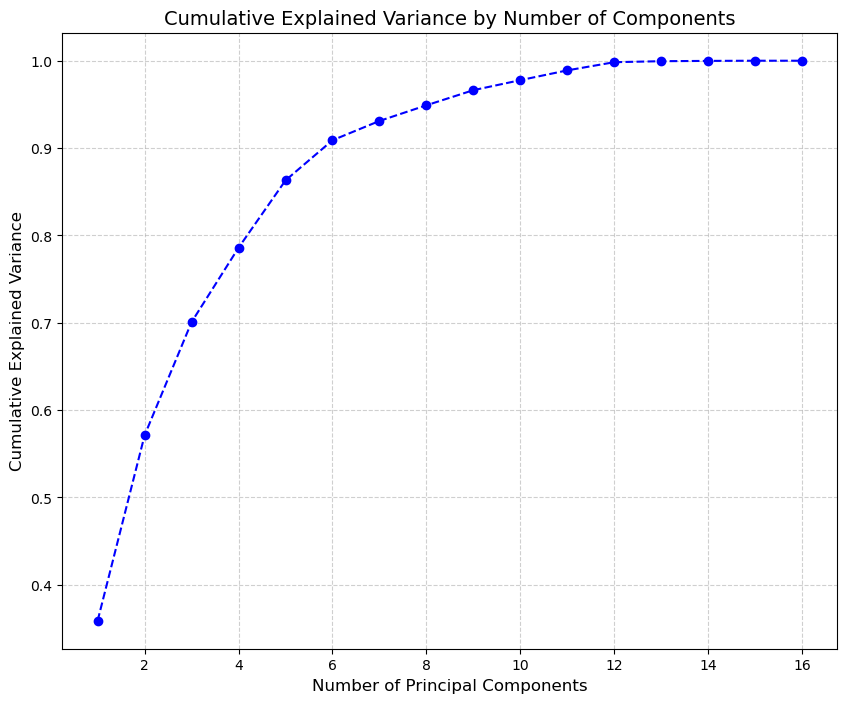

In [127]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Compute the cumulative sum of explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative variance
ax.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 
        marker='o', linestyle='--', color='b')

# Add labels and title
ax.set_title('Cumulative Explained Variance by Number of Components', fontsize=14)
ax.set_xlabel('Number of Principal Components', fontsize=12)
ax.set_ylabel('Cumulative Explained Variance', fontsize=12)

# Show grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

In [128]:
# choose 9, retaining almost all the variance level
pca = PCA(n_components=7)
pca.fit(train_data_pca)
train_pca_scores = pca.transform(train_data_pca)

We can choose any number of component above 6, since it will explain more than %90 of variance. We choose 7 as optimal numbers of components.

In [129]:
train_norm_pca_df = pd.concat([train_norm_df.reset_index(drop=True), pd.DataFrame(
    data=train_pca_scores, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7'])], axis=1)

In [130]:
train_pca_features = ["pca_"+f"{i}" for i in range(1, 8)]

In [131]:
train_norm_pca_df.head()

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,...,PACE_PER40_n,POSS_n,PIE_n,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,2,2809,...,0.006227,0.719008,0.616957,0.090774,0.389464,0.233453,0.088523,-0.002121,0.161795,-0.039226
1,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,2,1802,...,0.006047,0.454545,0.616522,-0.062935,0.096020,0.087436,0.129385,-0.180478,-0.019063,0.069420
2,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,3,1909,...,0.006390,0.504132,0.611870,0.425987,-0.240465,0.036700,-0.174419,-0.014170,-0.082939,-0.092718
3,41500407,2016-06-19,1610612739,CLE,Cleveland,2747,JR Smith,JR,1,2335,...,0.006293,0.603306,0.610565,0.029798,0.026114,0.218617,-0.061164,0.046774,-0.053354,-0.011794
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202681,Kyrie Irving,Kyrie,1,2580,...,0.006199,0.661157,0.613435,0.082437,-0.040666,0.302849,-0.090352,0.027268,0.036895,0.047221


In [132]:
# initialize Logistic Regression model for train_norm_pca_df
logres = LogisticRegression(max_iter = 1000,
    solver='lbfgs',
    n_jobs=-1)

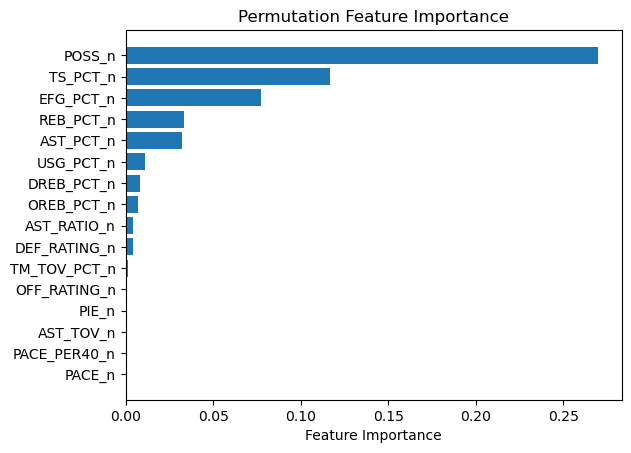

OFF_RATING_n    0.000507
DEF_RATING_n    0.003921
AST_PCT_n       0.032232
AST_TOV_n       0.000070
AST_RATIO_n     0.004421
OREB_PCT_n      0.006943
DREB_PCT_n      0.008159
REB_PCT_n       0.033498
TM_TOV_PCT_n    0.001227
EFG_PCT_n       0.077021
TS_PCT_n        0.116596
USG_PCT_n       0.010761
PACE_n          0.000014
PACE_PER40_n    0.000014
POSS_n          0.269816
PIE_n           0.000095
dtype: float64

In [133]:
feat_permutation_importance(train_norm_pca_df, train_norm_features, logres)

We stil have many features and removing some of them can increase signifance of others.

In [149]:
selected_features_12, ranks = rfe_feature_selection(train_norm_pca_df, train_norm_features, 12, logres)
print(ranks)

         Feature  Ranking
0   OFF_RATING_n        1
1   DEF_RATING_n        1
2      AST_PCT_n        1
4    AST_RATIO_n        1
5     OREB_PCT_n        1
6     DREB_PCT_n        1
7      REB_PCT_n        1
9      EFG_PCT_n        1
10      TS_PCT_n        1
11     USG_PCT_n        1
14        POSS_n        1
15         PIE_n        1
13  PACE_PER40_n        2
8   TM_TOV_PCT_n        3
12        PACE_n        4
3      AST_TOV_n        5


In [150]:
train_model(train_norm_pca_df, 5, selected_features_12, logres)

Fold 0, Accuracy: 0.7242
Fold 1, Accuracy: 0.7187
Fold 2, Accuracy: 0.7190
Fold 3, Accuracy: 0.7189
Fold 4, Accuracy: 0.7170
Mean Accuracy: 0.7195


0.7195495327600436

In [151]:
selected_features_8, ranks = rfe_feature_selection(train_norm_pca_df, train_norm_features, 8, logres)
print(ranks)

         Feature  Ranking
1   DEF_RATING_n        1
5     OREB_PCT_n        1
7      REB_PCT_n        1
9      EFG_PCT_n        1
10      TS_PCT_n        1
11     USG_PCT_n        1
14        POSS_n        1
15         PIE_n        1
2      AST_PCT_n        2
0   OFF_RATING_n        3
6     DREB_PCT_n        4
4    AST_RATIO_n        5
13  PACE_PER40_n        6
8   TM_TOV_PCT_n        7
12        PACE_n        8
3      AST_TOV_n        9


In [152]:
train_model(train_norm_pca_df, 5, selected_features_8, logres)

Fold 0, Accuracy: 0.7096
Fold 1, Accuracy: 0.7063
Fold 2, Accuracy: 0.7080
Fold 3, Accuracy: 0.7049
Fold 4, Accuracy: 0.7068
Mean Accuracy: 0.7071


0.7071270732941082

In [154]:
# Remove the '_n' suffix from the selected features
train_selected_features = [feature.replace('_n', '') for feature in selected_features_12]

print(train_selected_features)

['OFF_RATING', 'DEF_RATING', 'AST_PCT', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'POSS', 'PIE']


In [155]:
# define a grid of parameters
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100]
}

In [156]:
# initialize grid search
# estimator is the model that we have defined
# we use f1_weighted as our metric
# cv=5 means that we are using 5 fold cv
from sklearn import model_selection
model = model_selection.GridSearchCV(
    estimator=logres,
    param_grid=param_grid,
    scoring="f1_weighted",
    verbose=10,
    n_jobs=1,
    cv=5
)

In [158]:
X = train_norm_pca_df[selected_features_12].values
y = train_norm_pca_df.gm_cluster.values

In [159]:
# fit model on training data
model.fit(X, y)

print(f"Best score: {model.best_score_}")

print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=0.001.....................................................
[CV 1/5; 1/6] END ......................C=0.001;, score=0.628 total time=   1.4s
[CV 2/5; 1/6] START C=0.001.....................................................
[CV 2/5; 1/6] END ......................C=0.001;, score=0.627 total time=   1.5s
[CV 3/5; 1/6] START C=0.001.....................................................
[CV 3/5; 1/6] END ......................C=0.001;, score=0.635 total time=   1.5s
[CV 4/5; 1/6] START C=0.001.....................................................
[CV 4/5; 1/6] END ......................C=0.001;, score=0.634 total time=   1.5s
[CV 5/5; 1/6] START C=0.001.....................................................
[CV 5/5; 1/6] END ......................C=0.001;, score=0.635 total time=   1.5s
[CV 1/5; 2/6] START C=0.01......................................................
[CV 1/5; 2/6] END .......................C=0.01;,

In [160]:
# initialize tuned Logistic Regression model
tuned_logres = LogisticRegression(max_iter = 1000,
    C=100,
    solver='lbfgs',
    n_jobs=-1)

In [161]:
train_model(train_norm_pca_df, 5, selected_features_12, tuned_logres)

Fold 0, Accuracy: 0.7244
Fold 1, Accuracy: 0.7189
Fold 2, Accuracy: 0.7195
Fold 3, Accuracy: 0.7199
Fold 4, Accuracy: 0.7172
Mean Accuracy: 0.7200


0.7199701818375442

In [162]:
train_model(train_norm_pca_df, 5, train_pca_features, tuned_logres)

Fold 0, Accuracy: 0.7217
Fold 1, Accuracy: 0.7141
Fold 2, Accuracy: 0.7152
Fold 3, Accuracy: 0.7145
Fold 4, Accuracy: 0.7153
Mean Accuracy: 0.7161


0.7161470674369692

# Light GBM

In [163]:
# Initialize the LightGBM Classifier
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(n_jobs=-1, verbose = -1)


In [164]:
train_model(train_norm_pca_df, 5, selected_features_12, lgb_clf)

Fold 0, Accuracy: 0.7333
Fold 1, Accuracy: 0.7281
Fold 2, Accuracy: 0.7287
Fold 3, Accuracy: 0.7269
Fold 4, Accuracy: 0.7251
Mean Accuracy: 0.7284


0.7284151114187588

In [165]:
param_grid = {
    "num_leaves": [31, 50],  # Number of leaves in the tree (higher values can make the model more complex)
    "learning_rate": [0.05, 0.1],  # Learning rate (lower values require more boosting rounds)
    "n_estimators": [100, 150, 200],  # Number of boosting rounds (trees)
    "max_depth": [-1, 5],  # Maximum depth of the tree, -1 means no limit
    "min_child_samples": [20, 30],  # Minimum number of data points in a leaf
    "colsample_bytree": [0.8, 1.0],  # Fraction of features to consider for each tree
    "subsample": [0.8, 1.0],  # Fraction of data to be used for fitting each tree (to prevent overfitting)
}

In [166]:
from sklearn.model_selection import GridSearchCV
# initialize grid search

# we use f1 as our metric
# cv=5 means that we are using 5 fold cv
model = model_selection.GridSearchCV(
    estimator=lgb_clf,
    param_grid=param_grid,
    scoring="f1_weighted",
    verbose=10,
    n_jobs=1,
    cv=5
)

In [167]:
# fit model on training data
model.fit(X, y)

# get best score
print(f"Best score: {model.best_score_}")

# get best params
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5; 1/192] START colsample_bytree=0.8, learning_rate=0.05, max_depth=-1, min_child_samples=20, n_estimators=100, num_leaves=31, subsample=0.8
[CV 1/5; 1/192] END colsample_bytree=0.8, learning_rate=0.05, max_depth=-1, min_child_samples=20, n_estimators=100, num_leaves=31, subsample=0.8;, score=0.719 total time=   1.5s
[CV 2/5; 1/192] START colsample_bytree=0.8, learning_rate=0.05, max_depth=-1, min_child_samples=20, n_estimators=100, num_leaves=31, subsample=0.8
[CV 2/5; 1/192] END colsample_bytree=0.8, learning_rate=0.05, max_depth=-1, min_child_samples=20, n_estimators=100, num_leaves=31, subsample=0.8;, score=0.718 total time=   1.3s
[CV 3/5; 1/192] START colsample_bytree=0.8, learning_rate=0.05, max_depth=-1, min_child_samples=20, n_estimators=100, num_leaves=31, subsample=0.8
[CV 3/5; 1/192] END colsample_bytree=0.8, learning_rate=0.05, max_depth=-1, min_child_samples=20, n_estimators=100, num_leaves=31, subsample

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best score: 0.7218224201696597
Best parameters set:
	colsample_bytree: 0.8
	learning_rate: 0.1
	max_depth: -1
	min_child_samples: 20
	n_estimators: 100
	num_leaves: 50
	subsample: 0.8


In [168]:
tuned_lgb = lgb.LGBMClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=-1,
    min_child_samples=20,
    n_estimators=100,
    num_leaves=50,
    subsample=0.8,
    n_jobs=-1,
    verbose=-1
)


In [169]:
train_model(train_norm_pca_df, 5, selected_features_12, tuned_lgb)

Fold 0, Accuracy: 0.7339
Fold 1, Accuracy: 0.7263
Fold 2, Accuracy: 0.7284
Fold 3, Accuracy: 0.7261
Fold 4, Accuracy: 0.7259
Mean Accuracy: 0.7281


0.7281062804504673

In [170]:
train_model(train_norm_pca_df, 5, train_pca_features, tuned_lgb)

Fold 0, Accuracy: 0.7254
Fold 1, Accuracy: 0.7199
Fold 2, Accuracy: 0.7200
Fold 3, Accuracy: 0.7187
Fold 4, Accuracy: 0.7191
Mean Accuracy: 0.7206


0.7206091424615958

# Random Forest

In [171]:
from sklearn import ensemble
# initialize Random Forest model
rf = ensemble.RandomForestClassifier(
    n_jobs=-1
    )

In [172]:
train_model(train_norm_pca_df, 5, selected_features_12, rf)

Fold 0, Accuracy: 0.7271
Fold 1, Accuracy: 0.7202
Fold 2, Accuracy: 0.7207
Fold 3, Accuracy: 0.7205
Fold 4, Accuracy: 0.7205
Mean Accuracy: 0.7218


0.7218018689598253

In [173]:
# define a grid of parameters
param_grid = {
    "n_estimators": [100, 200, 250, 300, 400, 500],
    "max_depth": [1, 2, 5, 7, 11, 15],
    "criterion": ["gini", "entropy"]
}

In [174]:
# initialize grid search
# we use f1_weighted as our metric
# cv=5 means that we are using 5 fold cv
model = model_selection.GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="f1_weighted",
    verbose=10,
    n_jobs=1,
    cv=5
)

In [175]:
# fit model on training data
model.fit(X, y)

# get best score
print(f"Best score: {model.best_score_}")

# get best params
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 1/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.379 total time=   0.5s
[CV 2/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.372 total time=   0.5s
[CV 3/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.372 total time=   0.5s
[CV 4/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 4/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.380 total time=   0.5s
[CV 5/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 5/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.379 total time=   0.5s
[CV 1/5; 2/72] START criterion=gini, max_de

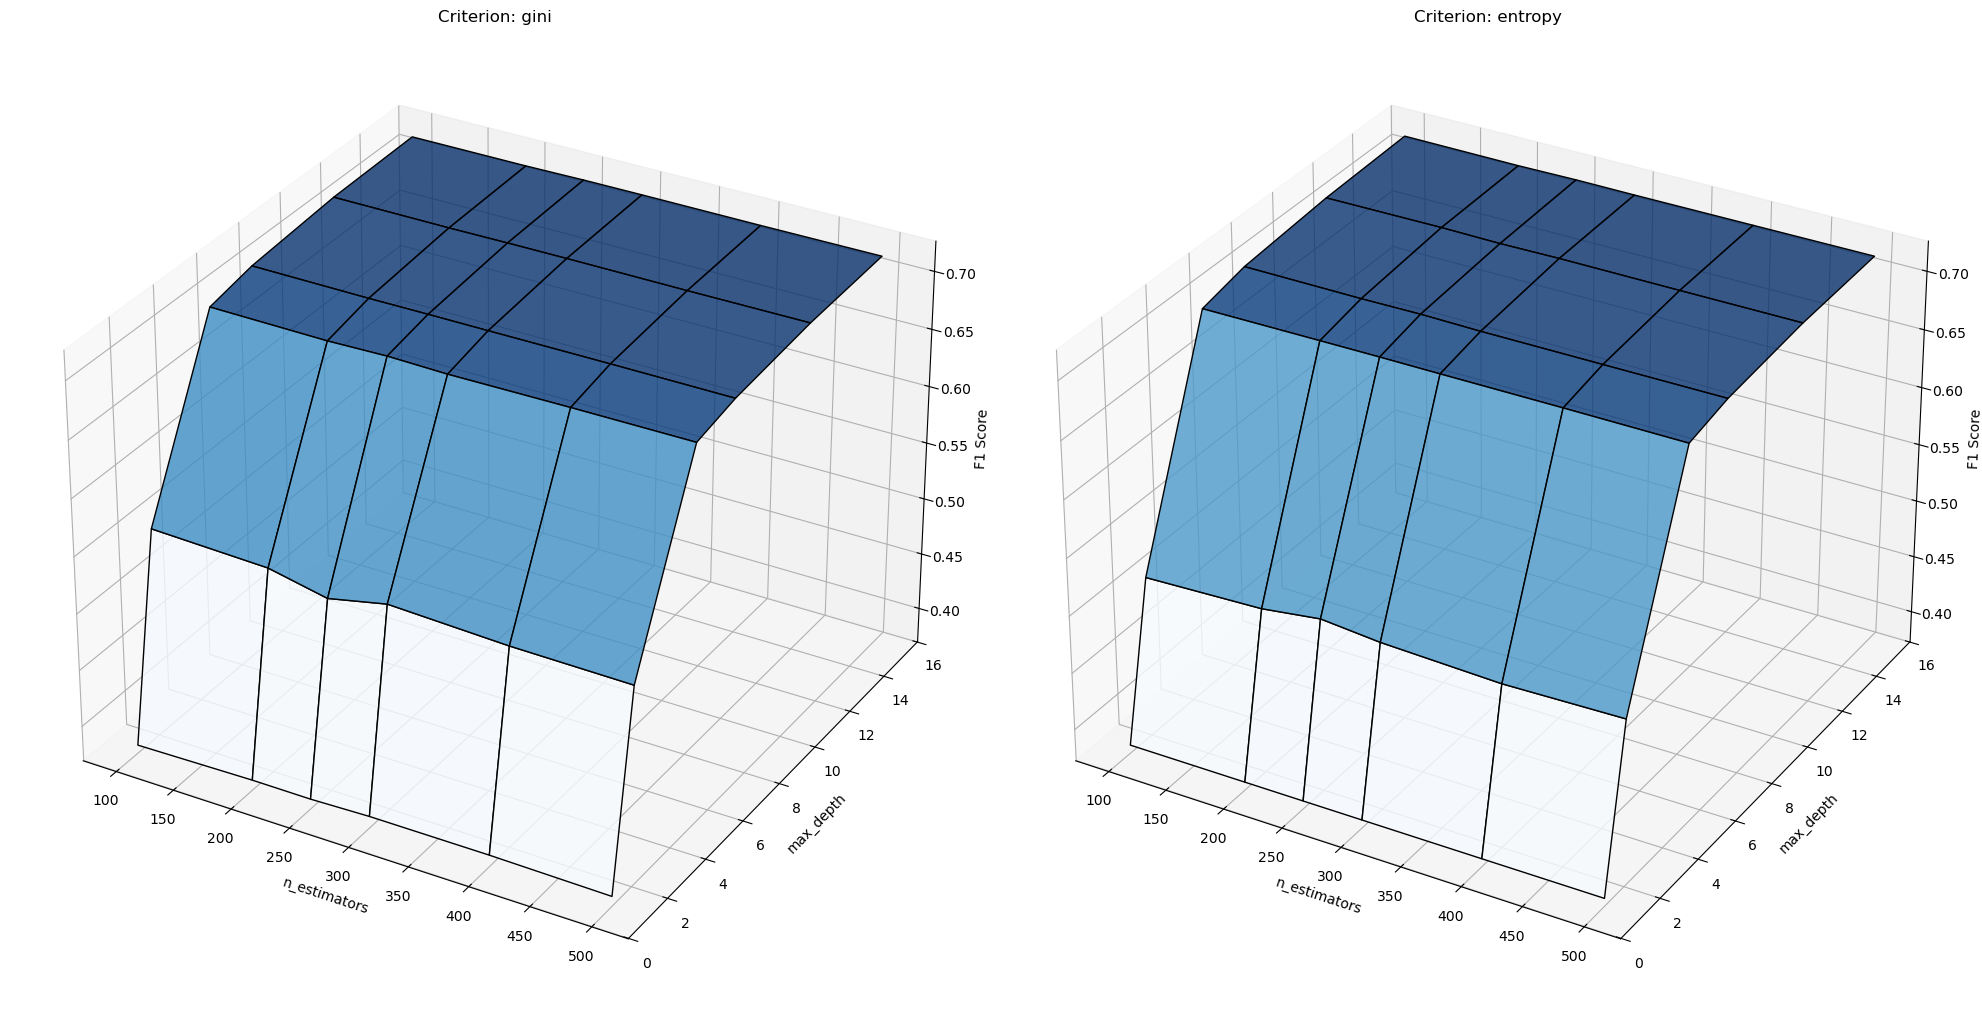

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract results from GridSearchCV
results = model.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

criteria = ["gini", "entropy"]
fig = plt.figure(figsize=(20, 10))

for i, criterion in enumerate(criteria):
    filtered_results = [
        (param['n_estimators'], param['max_depth'], mean_test_scores[idx])
        for idx, param in enumerate(params)
        if param['criterion'] == criterion
    ]
    
    n_estimators = np.array([x[0] for x in filtered_results])
    max_depth = np.array([x[1] for x in filtered_results])
    scores = np.array([x[2] for x in filtered_results])
    
    n_estimators_unique = np.unique(n_estimators)
    max_depth_unique = np.unique(max_depth)
    X, Y = np.meshgrid(n_estimators_unique, max_depth_unique)
    Z = np.zeros_like(X, dtype=float)
    
    for x, y, z in zip(n_estimators, max_depth, scores):
        Z[np.where(max_depth_unique == y)[0][0], np.where(n_estimators_unique == x)[0][0]] = z
    
    ax = fig.add_subplot(1, 2, i + 1, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='k', alpha=0.8)
    ax.set_title(f"Criterion: {criterion}")
    ax.set_xlabel("n_estimators")
    ax.set_ylabel("max_depth")
    ax.set_zlabel("F1 Score")

plt.tight_layout()
plt.show()


In [177]:
# initialize tuned Random Forest model
tuned_rf = ensemble.RandomForestClassifier(
    criterion='gini',
    max_depth=15,
    n_estimators=500,
    n_jobs=-1
)

In [178]:
train_model(train_norm_pca_df, 5, selected_features_12, tuned_rf)

Fold 0, Accuracy: 0.7317
Fold 1, Accuracy: 0.7257
Fold 2, Accuracy: 0.7266
Fold 3, Accuracy: 0.7237
Fold 4, Accuracy: 0.7232
Mean Accuracy: 0.7262


0.7261840739064456

In [179]:
train_model(train_norm_pca_df, 5, train_pca_features, tuned_rf)

Fold 0, Accuracy: 0.7246
Fold 1, Accuracy: 0.7172
Fold 2, Accuracy: 0.7182
Fold 3, Accuracy: 0.7169
Fold 4, Accuracy: 0.7164
Mean Accuracy: 0.7187


0.7186709619019729

# Using plays from the 2022-23 and 2023-24 seasons to measure whether players are indeed traded based on performance

In [180]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def filter_data_by_year(df, year):
    return df[df['GAME_DATE'].dt.year == year]

def preprocess_data(df):
    df = df.dropna(subset=["MIN"]).copy()
    df.drop(columns=["START_POSITION", "MIN"], inplace=True)
    return df

def normalize_features(df, feature_columns):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[feature_columns].values)
    normalized_columns = [feat + '_n' for feat in feature_columns]
    norm_df = pd.concat([df.reset_index(drop=True), pd.DataFrame(data=scaled_data, columns=normalized_columns)], axis=1)
    return norm_df, normalized_columns

def apply_pca(df, normalized_columns, n_components=7):
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(df[normalized_columns].values)
    pca_columns = [f'pca_{i+1}' for i in range(n_components)]
    pca_df = pd.concat([df.reset_index(drop=True), pd.DataFrame(data=pca_data, columns=pca_columns)], axis=1)
    return pca_df, pca_columns

def add_cluster_predictions(df, pca_columns, model):
    X = df[pca_columns].values
    df['pred_cluster'] = model.predict(X)
    return df

def process_player_data(player_name, trade_date, df):
    player_df = df[(df.PLAYER_NAME == player_name) & (df.GAME_DATE < trade_date)].copy()
    cluster_counts = player_df['pred_cluster'].value_counts(normalize=True) * 100
    return cluster_counts

def process_trades(trade_data, processed_df, expected_clusters, trade_year):
    trade_data['DATE_OF_SIGN'] = pd.to_datetime(trade_data['DATE_OF_SIGN'])
    filtered_trades = trade_data[trade_data['DATE_OF_SIGN'].dt.year == trade_year]

    correct_trades = 0
    total_trades = 0

    for index, trade in filtered_trades.iterrows():
        print(f"\nProcessing trade for {trade['TRADED']} ({trade['POSITION']})...")
        candidate_percentages = []

        for player in trade['CANDIDATES'].split(','):
            player = player.strip()
            print(f"  Processing data for {player}...")
            cluster_percentages = process_player_data(player, trade['DATE_OF_SIGN'], processed_df)
            candidate_percentages.append((player, cluster_percentages))
            print(f"    Cluster percentages for {player}:\n{cluster_percentages}")

        target_player_percentages = process_player_data(trade['TRADED'], trade['DATE_OF_SIGN'], processed_df)
        print(f"    Target player {trade['TRADED']} cluster percentages:\n{target_player_percentages}")
        
        # Combine all candidates (including traded player) and sort by the expected cluster percentage
        expected_cluster = expected_clusters.get(trade['POSITION'], None)
        if expected_cluster is not None:
            all_candidates = candidate_percentages + [(trade['TRADED'], target_player_percentages)]
            sorted_candidates = sorted(
                all_candidates,
                key=lambda x: x[1].get(expected_cluster, 0),
                reverse=True
            )
            
            # Check if the traded player is in the top 3
            total_trades += 1
            top_candidates = sorted_candidates[:3]
            if any(player == trade['TRADED'] for player, _ in top_candidates):
                correct_trades += 1
                print(f"    The traded player {trade['TRADED']} is in the top 3 candidates for the expected cluster ({expected_cluster}).")
            else:
                print(f"    The traded player {trade['TRADED']} is NOT in the top 3 candidates for the expected cluster ({expected_cluster}).")

    if total_trades > 0:
        accuracy = (correct_trades / total_trades) * 100
        print(f"\nOverall accuracy for trades in {trade_year}: {accuracy:.2f}%")
    else:
        print(f"\nNo trades found for the year {trade_year}.")

def main_pipeline(df, year, model, trade_data_path, expected_clusters, trade_year):
    df_year = filter_data_by_year(df, year)
    df_year.to_csv(f'nba_data_{year}.csv', index=False)
    print(f"{year} stats have been saved to 'nba_data_{year}.csv'.")

    df_year = preprocess_data(df_year)

    feature_columns = [
        col for col in df_year.columns
        if col not in (
            "GAME_ID", "TEAM_ID", "TEAM_ABBREVIATION", "TEAM_CITY",
            "PLAYER_ID", "PLAYER_NAME", "NICKNAME", "GAME_DATE"
        )
    ]

    df_year_norm, normalized_columns = normalize_features(df_year, feature_columns)
    df_year_pca, pca_columns = apply_pca(df_year_norm, normalized_columns)
    processed_df = add_cluster_predictions(df_year_pca, pca_columns, model)

    trade_data = pd.read_csv(trade_data_path)
    process_trades(trade_data, processed_df, expected_clusters, trade_year)

# Example usage:
# Assuming `df_2022_2024` is the dataset and `tuned_logres` is the trained model.
expected_clusters = {'C': 1, 'F': 3, 'G': 3}  # Example expected clusters by position
main_pipeline(df_2022_2024, 2022, tuned_lgb, 'NBA_TRADE.csv', expected_clusters, 2023)

2022 stats have been saved to 'nba_data_2022.csv'.

Processing trade for Rui Hachimura (F)...
  Processing data for Jerami Grant...
    Cluster percentages for Jerami Grant:
pred_cluster
3    48.333333
1    35.000000
0    16.666667
Name: proportion, dtype: float64
  Processing data for Rui Hachimura...
    Cluster percentages for Rui Hachimura:
pred_cluster
0    56.716418
1    41.791045
3     1.492537
Name: proportion, dtype: float64
    Target player Rui Hachimura cluster percentages:
pred_cluster
0    56.716418
1    41.791045
3     1.492537
Name: proportion, dtype: float64
    The traded player Rui Hachimura is in the top 3 candidates for the expected cluster (3).

Processing trade for Kendrick Nunn (G)...
  Processing data for Jaden Ivey...
    Cluster percentages for Jaden Ivey:
pred_cluster
3    58.974359
0    23.076923
1    17.948718
Name: proportion, dtype: float64
  Processing data for Shai Gilgeous-Alexander...
    Cluster percentages for Shai Gilgeous-Alexander:
pred_cluster


In [181]:
main_pipeline(df_2022_2024, 2023, tuned_lgb, 'NBA_TRADE.csv', expected_clusters, 2024)

2023 stats have been saved to 'nba_data_2023.csv'.

Processing trade for P.J. Washington (F)...
  Processing data for Jimmy Butler...
    Cluster percentages for Jimmy Butler:
pred_cluster
3    65.168539
1    25.842697
0     8.988764
Name: proportion, dtype: float64
  Processing data for Dorian Finney-Smith...
    Cluster percentages for Dorian Finney-Smith:
pred_cluster
1    58.904110
0    35.616438
3     4.109589
2     1.369863
Name: proportion, dtype: float64
  Processing data for Bogdan Bogdanović...
    Cluster percentages for Bogdan Bogdanović:
pred_cluster
0    52.439024
3    28.048780
1    19.512195
Name: proportion, dtype: float64
  Processing data for Matisse Thybulle...
    Cluster percentages for Matisse Thybulle:
pred_cluster
0    55.405405
1    33.783784
2     6.756757
3     4.054054
Name: proportion, dtype: float64
  Processing data for P.J. Washington...
    Cluster percentages for P.J. Washington:
pred_cluster
1    57.352941
3    29.411765
0    11.764706
2     1.470588

In [185]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

def load_and_preprocess_data(df, year):
    df_year = df[df['GAME_DATE'].dt.year == year].copy()
    df_year.dropna(subset=["MIN"], inplace=True)
    df_year.drop(columns=["START_POSITION", "MIN"], inplace=True)
    return df_year

def normalize_data(df, excluded_columns):
    features = [col for col in df.columns if col not in excluded_columns]
    data = df[features].values
    scaler = MinMaxScaler()
    scaler.fit(data)
    normalized_data = scaler.transform(data)
    normalized_features = [feat + '_n' for feat in features]
    norm_df = pd.concat([df.reset_index(drop=True), pd.DataFrame(data=normalized_data, columns=normalized_features)], axis=1)
    return norm_df, normalized_features

def apply_pca(df, features, n_components):
    pca = PCA(n_components=n_components)
    pca_data = df[features].values
    pca.fit(pca_data)
    pca_scores = pca.transform(pca_data)
    pca_columns = [f'pca_{i+1}' for i in range(n_components)]
    pca_df = pd.concat([df.reset_index(drop=True), pd.DataFrame(data=pca_scores, columns=pca_columns)], axis=1)
    return pca_df, pca_columns

def predict_clusters(df, pca_features, model, date_filter):
    filtered_df = df[df['GAME_DATE'] < date_filter].copy()
    X_test = filtered_df[pca_features].values
    y_pred = model.predict(X_test)
    filtered_df['pred_cluster'] = y_pred
    return filtered_df

def analyze_candidates(df, candidates, position):
    position_cluster = {'C': 1, 'F': 3, 'G': 3}
    target_cluster = position_cluster.get(position)

    best_candidate = None
    highest_percentage = 0

    for candidate in candidates:
        candidate_df = df[df['PLAYER_NAME'] == candidate].copy()
        cluster_counts = candidate_df['pred_cluster'].value_counts(normalize=True)
        cluster_percentage = cluster_counts.get(target_cluster, 0)

        print(f"{candidate} - Cluster {target_cluster} Percentage: {cluster_percentage:.2%}")

        if cluster_percentage > highest_percentage:
            highest_percentage = cluster_percentage
            best_candidate = candidate

    return best_candidate

def main(candidates, position, team):
    file_path = df_2022_2024
    year = 2024
    excluded_columns = ["GAME_ID", "TEAM_ID", "TEAM_ABBREVIATION", "TEAM_CITY", "PLAYER_ID", "PLAYER_NAME", "NICKNAME", "GAME_DATE"]
    date_filter = '2024-12-01'

    df = load_and_preprocess_data(file_path, year)
    norm_df, normalized_features = normalize_data(df, excluded_columns)
    pca_df, pca_features = apply_pca(norm_df, normalized_features, n_components=7)
    preds_df = predict_clusters(pca_df, pca_features, tuned_lgb, date_filter)

    best_candidate = analyze_candidates(preds_df, candidates, position)
    print(f"The recommended player for {team} at the position {position} is: {best_candidate}")

# Transfer suggestion for the Orlando Magic at the G position for the 2024-25 season

In [187]:
main(["Anfernee Simons", "Malik Monk", "D'Angelo Russell", "Tyus Jones", "Gary Trent Jr."], 'G', 'Orlando Magic')

Anfernee Simons - Cluster 3 Percentage: 72.92%
Malik Monk - Cluster 3 Percentage: 47.27%
D'Angelo Russell - Cluster 3 Percentage: 73.13%
Tyus Jones - Cluster 3 Percentage: 78.43%
Gary Trent Jr. - Cluster 3 Percentage: 19.64%
The recommended player for Orlando Magic at the position G is: Tyus Jones


# Transfer suggestion for the Golden State Warriors at the F position for the 2024-25 season

In [189]:
main(["Julius Randle", "John Collins", "DeMar DeRozan", "Lauri Markkanen", "Brandon Ingram"], 'F', 'Golden State Warriors')

Julius Randle - Cluster 3 Percentage: 28.57%
John Collins - Cluster 3 Percentage: 1.82%
DeMar DeRozan - Cluster 3 Percentage: 65.15%
Lauri Markkanen - Cluster 3 Percentage: 11.11%
Brandon Ingram - Cluster 3 Percentage: 55.56%
The recommended player for Golden State Warriors at the position F is: DeMar DeRozan


# Transfer suggestion for the Indiana Pacers at the C position for the 2024-25 season

In [190]:
main(["Nikola Vučević", "Jakob Poeltl", "Bismack Biyombo", "Moses Brown", "Isaiah Stewart"], 'C', 'Indiana Pacers')

Nikola Vučević - Cluster 1 Percentage: 95.31%
Jakob Poeltl - Cluster 1 Percentage: 0.00%
Bismack Biyombo - Cluster 1 Percentage: 14.29%
Moses Brown - Cluster 1 Percentage: 0.00%
Isaiah Stewart - Cluster 1 Percentage: 51.35%
The recommended player for Indiana Pacers at the position C is: Nikola Vučević
